--Araba, Külahta Dondurma, Cricket Topu--
--!! Şuan model dosyası Proje Klasörü içinde bulunuyor..!!
--Yine de Modeli tekrardan diske PICKLE ile oluşturmak ister misiniz?? Bu işlem zaman alabilir!
Hayır DEVAM EDELİM= n - Evet oluştursun= y  : n
Resim URLsi Giriniz: https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQbly1_7P8UwSe4erWcZ0nTfH-0cs2VF_URtQ&usqp=CAU


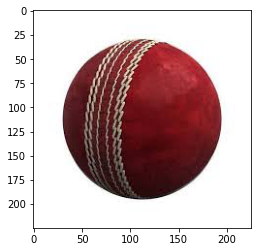

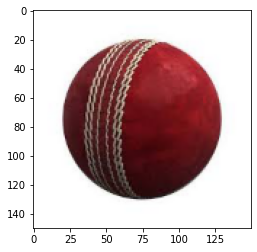

cars = 18.530428133090744%
ice_cream_cone = 5.4762859885431645%
cricket_ball = 75.9932858783661%
Tahmin edilen : cricket_ball


In [5]:
from sklearn.linear_model import LogisticRegression 
import os
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage.transform import resize
from skimage.io import imread


siniflar=['cars','ice_cream_cone','cricket_ball']
print("--Araba, Külahta Dondurma, Cricket Topu--")
print("--!! Şuan model dosyası Proje Klasörü içinde bulunuyor..!!")            
print("--Yine de Modeli tekrardan diske PICKLE ile oluşturmak ister misiniz?? Bu işlem zaman alabilir!")
secim=input("Hayır DEVAM EDELİM= n - Evet oluştursun= y  : ") 

if(secim=='y'or secim=='Y'):
    ham_veriler=[] 
    sonuclanacak=[]
    datadir="/content/drive/MyDrive/Colab Notebooks/decisionTree/DatasetForImageClassification/"
    #ilk for ile her kategoriyi tarıyorum, ikinci for ile içindeki resimleri resize ve flat edip listeye atıyorum
    for sinif in siniflar:
        path=os.path.join(datadir,sinif)
        for img in os.listdir(path):
            img_array=imread(os.path.join(path,img))
            img_resized=resize(img_array,(150,150,3))
            ham_veriler.append(img_resized.flatten())
            sonuclanacak.append(siniflar.index(sinif))

    #burada ham_veriler listesini numpy dizisi haline getiriyorum ki 'iloc[]' edebileyim
    duzenli_veriler=np.array(ham_veriler) 
    sonuc=np.array(sonuclanacak)
    df=pd.DataFrame(duzenli_veriler)
    # sonuc kolonumu ekliyorum
    df['Sonuc']=sonuc
    print("Model oluşturma işlemi Başlıyor..")
    #df
    
    # veri dizimi train için iloc ediyorum
    x=df.iloc[:,:-1]
    y=df.iloc[:,-1]

    # klasik train_test_split işlemi
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
    print('Egitim Tamamlandı!')
    
    #gris test denenecek değerler
    grid = {'penalty' : ['l1', 'l2'],
    'C' : np.logspace(-3,-4,4,3,20),
    'solver' : ['liblinear']}
    
    regress=LogisticRegression(max_iter=2500)
    
    #GridSearchin en iyi parametreleri kullanılıyor
    model=GridSearchCV(regress,grid,cv=5)
    
    #model eğitim
    print("Model eğitim işlemi başladı lütfen bekleyiniz... Tahmini: 10 dakika")
    model.fit(x_train,y_train)
    print("Model eğitim işlemi bitti!")
    #best params değerleri
    print("En iyi parametreler")
    
    
    print(model.best_params_)
    print(model.best_estimator_)
    
    y_prediction=model.predict(x_test)
    print(f"Modelin doğruluk oranı: {accuracy_score(y_prediction,y_test)*100}% ")
    
    #cross val
    #cv_results = cross_validate(model, x, y, cv=5)
    #print("cross val"+cv_results['test_score'])
    
    # modeli PICKLE ile diske kaydediyorum
    pick = open('/content/drive/MyDrive/Colab Notebooks/decisionTree/siniflama_model.p','wb')
    pickle.dump(model,pick)
    pick.close()
    print("Pickle başarıyla oluşturuldu!! Kontrol Ediniz ve Kodu TEKRARDAN ÇALIŞTIRARAK HAYIR seçeneği ile devam ediniz..")
   


elif(secim=='n'or secim=='N'):
    
    # modeli çağırıyorum
    model=pickle.load(open('/content/drive/MyDrive/Colab Notebooks/decisionTree/siniflama_model.p','rb'))
    # tahmin edilecek resim giriliyor
    url=input('Resim URLsi Giriniz: ')
    imge=imread(url)
    plt.imshow(imge)
    plt.show()
    
    # tahmin edilecek resmi düzenleyip oranları for döngüsü ile yazdırıyorum
    img_resize1=resize(imge,(150,150))
    deneme_resim=[img_resize1.flatten()]
    plt.imshow(img_resize1)
    plt.show()
    tahmin=model.predict_proba(deneme_resim)
    for ind,cesit in enumerate(siniflar):
      print(f'{cesit} = {tahmin[0][ind]*100}%')
    print("Tahmin edilen : "+ siniflar[model.predict(deneme_resim)[0]])

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


--Araba, Külahta Dondurma, Cricket Topu--
--!! Şuan model dosyası Proje Klasörü içinde bulunuyor..!!
--Yine de Modeli tekrardan diske PICKLE ile oluşturmak ister misiniz?? Bu işlem zaman alabilir!
Hayır DEVAM EDELİM= n - Evet oluştursun= y  : y
Model oluşturma işlemi Başlıyor..
Egitim Tamamlandı!
Model eğitim işlemi başladı lütfen bekleyiniz... Tahmini: 10 dakika
Model eğitim işlemi bitti!
En iyi parametreler
{'C': 0.000125, 'penalty': 'l2', 'solver': 'liblinear'}
LogisticRegression(C=0.000125, solver='liblinear')
Modelin doğruluk oranı: 70.0% 
Pickle başarıyla oluşturuldu!! Kontrol Ediniz ve Kodu TEKRARDAN ÇALIŞTIRARAK HAYIR seçeneği ile devam ediniz..
